### Sandra P K

# Iris Flower Classification

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

### Read the Dataset

In [2]:
d=pd.read_csv(r"C:\Users\HP\Documents\My DOCS\Oasis_Intern\Task1\Iris.csv")
d

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
d.head()  # To display first 5 rows 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
d.tail()     # To display last 5 rows 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
d.describe()        # Statistical information about dataset 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
d.shape   # Display the number of rows and columns 

(150, 6)

In [7]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
d.columns     # Display the all columns 

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [9]:
d.duplicated().sum()      # Find out the number of duplicated entries

0

In [10]:
d.isnull().sum()       # Find the number of null or missing values

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

#### In the given dataset there is no null values and duplicate items 

In [11]:
d.drop('Id',axis=1)     # Drop irrelevant columns

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [12]:
d1=d[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]
d2=d[["Species"]]

#### Data split into two numerical(d1) and categorical(d2) data

## Encode the categorical columns 

In [13]:
from sklearn.preprocessing import LabelEncoder
for i in d2:
    encoder=LabelEncoder()
    d2[i]=encoder.fit_transform(d2[i])
d2.head()  

,Species
0,0
1,0
2,0
3,0
4,0


## Normalization

In [14]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
sc=s.fit_transform(d1)
d11=pd.DataFrame(sc,columns=d1.columns)
d11.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [15]:
df=pd.concat([d11,d2],axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,-0.900681,1.032057,-1.341272,-1.312977,0
1,-1.143017,-0.124958,-1.341272,-1.312977,0
2,-1.385353,0.337848,-1.398138,-1.312977,0
3,-1.506521,0.106445,-1.284407,-1.312977,0
4,-1.021849,1.263460,-1.341272,-1.312977,0


### Checking outliers

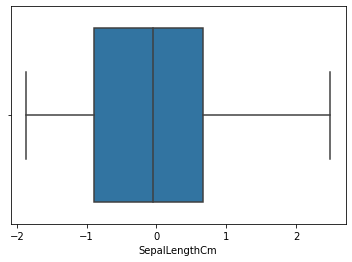

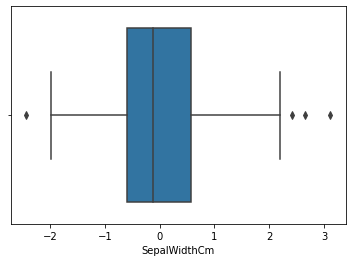

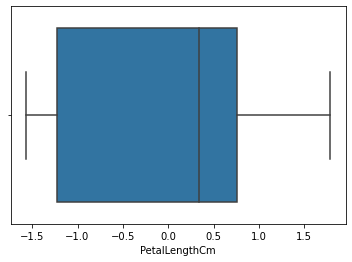

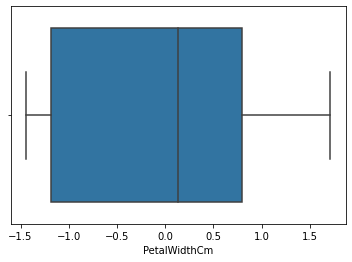

In [16]:
l=["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]
for i in l:
    sns.boxplot(df[i])
    plt.show()

### Remove outliers

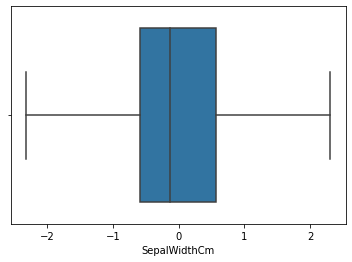

In [17]:
l=["SepalWidthCm"]
for i in l:
    Q1=np.percentile(df[i],25,interpolation="midpoint")
    Q3=np.percentile(df[i],75,interpolation="midpoint")
    
    IQR=Q3-Q1
    upper=Q3+1.5*IQR
    lower=Q1-1.5*IQR
    
    for j in df[i]:
        if j<lower:
            df[i]=df[i].replace(j,lower)
        elif j>upper:
            df[i]=df[i].replace(j,upper)
    sns.boxplot(df[i])
    plt.show()

<AxesSubplot:>

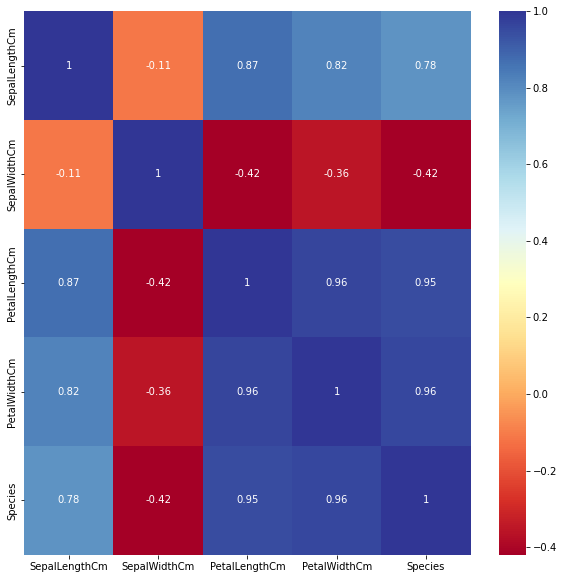

In [18]:
# Find the correlation between each pair of attributes 
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='RdYlBu')

#### heat map shows the correlation between attributes 

In [19]:
df=df.drop('SepalWidthCm',axis=1) 

In [20]:
df.head()

,SepalLengthCm,PetalLengthCm,PetalWidthCm,Species
0,-0.900681,-1.341272,-1.312977,0
1,-1.143017,-1.341272,-1.312977,0
2,-1.385353,-1.398138,-1.312977,0
3,-1.506521,-1.284407,-1.312977,0
4,-1.021849,-1.341272,-1.312977,0


### Data Visualization

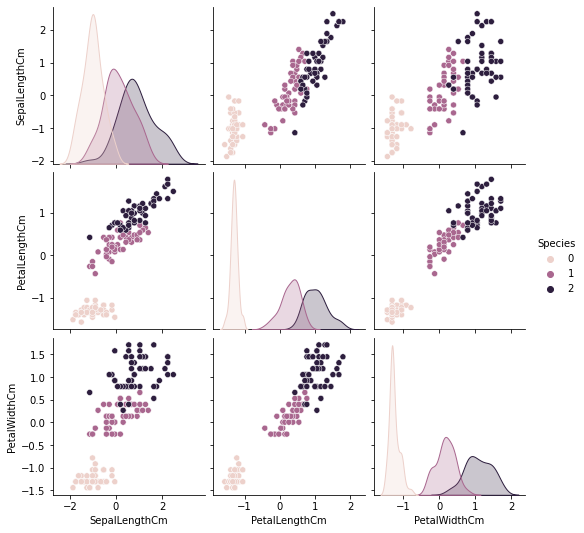

In [21]:
sns.pairplot(df, hue="Species", height=2.5)

#### Pairplot gives the pictorial representation of entire dataset by plotting graphs between all the columns

## Model Building 

In [22]:
# Splitting the dataset

x=df.drop('Species',axis=1)
y=df['Species']

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 

model= DecisionTreeClassifier()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [24]:
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [25]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Accuracy =", accuracy_score(y_test, y_pred))
print("\nClassification Report: \n",classification_report(y_test,y_pred))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))

Accuracy = 0.9555555555555556

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.85      0.92        13
           2       0.87      1.00      0.93        13

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45

Confusion Matrix: 
 [[19  0  0]
 [ 0 11  2]
 [ 0  0 13]]


Accuracy: The model is correct about 95.56% of the time.

Precision: For each class (0, 1, 2), it shows how often the model's positive predictions are correct.

Recall: For each class, it indicates how well the model finds all the actual positive instances.

F1-Score: It's a balance between precision and recall for each class.

Support: The number of actual instances for each class.

Confusion Matrix: A table showing correct and incorrect predictions for each class.

## Saving the Model

In [26]:
import pickle

save = pickle.dumps(model)
pickled_model = pickle.loads(save)
pickled_model.predict(x_test)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2, 1, 0,
       0])

## Prediction Unknown Data 

In [27]:
species_mapping = {0:'Iris-setosa', 1:'Iris-versicolor', 2:'Iris-virginica'}

prediction = model.predict([[6.3, 3.2, 1.4]])

species_mapping[prediction[0]]

'Iris-virginica'